<a href="https://colab.research.google.com/github/kishan038/Transport-Demand-Prediction/blob/main/Kishan_Chauhan_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Transport Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Nairobi is one of the most heavily congested cities in Africa. Each day thousands of kenyans make the trip into nairobi from towns such as kisii, keroka and beyond work, business or to visit friends family. The journey can long and the final approch into the city can impact the lenght of the trip significantly depending on traffic. How do traffic patterns influence people's decisions to come into ythe city by bus and shich bus to take? Does knowing the traffic patterns in nairobi help anticipate the demand for particular routes at particular times.
The aim to create a predictive model using different use cases which covers many aspects.
the dataset contains 51,645 observatons and 10 columns
to understand the data , we need to find out null values fromw which  i came to know there is no null value
From the EDA point of view kisii is top place from where the number of rights originate and also, we need to remove the constant feature that is tribal to and through that we found out our target variable as number of tickets
the we have some feature engineering and that the oberves the most of the tickets were sold at 7 AM and 8PM and that seems true because in the morning most of the people goes to work and office also there is no ride in betweet 12:00pm to 5:30 pm
While traing the model we used different ML algorithms amongst all XG boost with with they wont even parameters gives the best result and the speed having most important features amongst all of them
The resulting model can be used by Mobiticket and bus operators to anticipate customer demand for certain rides, to manage resorces and vehicles more effiently, to offer promotions and sell

# **GitHub Link -**

https://github.com/kishan038/Transport-Demand-Prediction

# **Problem Statement**


## **The challenge to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride i.e. for a specific route on specific date and time. there are 14 routes in this datset. All of the routes end in nairobi and originate in towns to the North West of Nairobi towards Lake Victoria**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [115]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Dataset Loading

In [116]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Capstone Project-2/train_revised[1].csv")

### Dataset First View

In [117]:
# Dataset First Look
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [118]:
# Dataset Rows & Columns count
df.shape

(51645, 10)

### Dataset Information

In [119]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [120]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [121]:
# Missing Values/Null Values Count
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

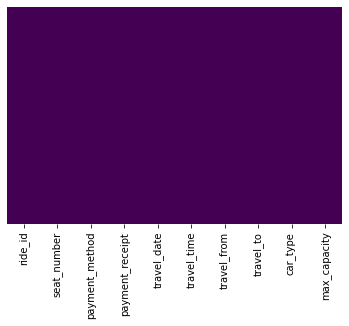

In [122]:
# Visualizing the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### What did you know about your dataset?

The Dataset given is from Nairobi Transport Department.

In thhis dataset we have to find out Transport demand prediction

The above datset has 51645 rows and 10 columns.

There is no missing values in the dataset

## ***2. Understanding Your Variables***

In [123]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [124]:
# Dataset Describe
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


### Variables Description 



*   ride_id: unique ID of a vehicle on a specific route on specific day adn time
*   seat_number: seat assigned to ticket


*   seat_number: seat assigned to ticket

*   payment_method: method used by customer to purchase ticket from Mobiticket(Cash or MPesa)

*   payment_receipt: unique id number for ticket purchased from Mobiticket

*   travel_date: date of ride departure. (MM/DD/YYYY)
*   travel_time: scheduled departure time of ride. rides generally depart on time 


*   travel_from: town from which rid originated


*   travel_to: destination of ride .all rides are to nairobi

*   car_type: vehicle type(shuttle or bus)
*  max_capacity: number of seats on the vehicle










### Check Unique Values for each variable.

In [125]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  ride_id is 6249 .
No. of unique values in  seat_number is 61 .
No. of unique values in  payment_method is 2 .
No. of unique values in  payment_receipt is 51645 .
No. of unique values in  travel_date is 149 .
No. of unique values in  travel_time is 78 .
No. of unique values in  travel_from is 17 .
No. of unique values in  travel_to is 1 .
No. of unique values in  car_type is 2 .
No. of unique values in  max_capacity is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [126]:
# Write your code to make your dataset analysis ready.
#Converting travelling time into hours only
df["travel_time"]=df["travel_time"].apply(lambda x: x[0:1])



In [127]:
#label encoding on payment method
df["payment_method"].replace({"MPesa":1,"Cash":0},inplace=True)
df["car_type"].replace({"Bus":1,"shuttle":0},inplace=True)

In [128]:
#finding our target variable as target variable is not given
df["seat_occupied"]=df.groupby(["car_type","travel_date","travel_from"])["travel_from"].transform("count")
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_occupied
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7,Migori,Nairobi,1,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7,Migori,Nairobi,1,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7,Keroka,Nairobi,1,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7,Homa Bay,Nairobi,1,49,36
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7,Migori,Nairobi,1,49,45
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8,Awendo,Nairobi,1,49,48
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8,Migori,Nairobi,1,49,69
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8,Migori,Nairobi,1,49,69
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7,Awendo,Nairobi,1,49,48


In [129]:
#dropping some feature which is not important
df2=df.drop(columns={"payment_receipt","seat_number"})
df2

,ride_id,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_occupied
0,1442,Mpesa,17-10-17,7,Migori,Nairobi,1,49,1
1,5437,Mpesa,19-11-17,7,Migori,Nairobi,1,49,1
2,5710,Mpesa,26-11-17,7,Keroka,Nairobi,1,49,1
3,5777,Mpesa,27-11-17,7,Homa Bay,Nairobi,1,49,36
4,5778,Mpesa,27-11-17,7,Migori,Nairobi,1,49,45
...,...,...,...,...,...,...,...,...,...
51640,13826,Mpesa,20-04-18,8,Awendo,Nairobi,1,49,48
51641,13809,Mpesa,20-04-18,8,Migori,Nairobi,1,49,69
51642,13809,Mpesa,20-04-18,8,Migori,Nairobi,1,49,69
51643,13796,Mpesa,20-04-18,7,Awendo,Nairobi,1,49,48


In [130]:
#eliminating duplicates
df2.drop_duplicates()

,ride_id,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_occupied
0,1442,Mpesa,17-10-17,7,Migori,Nairobi,1,49,1
1,5437,Mpesa,19-11-17,7,Migori,Nairobi,1,49,1
2,5710,Mpesa,26-11-17,7,Keroka,Nairobi,1,49,1
3,5777,Mpesa,27-11-17,7,Homa Bay,Nairobi,1,49,36
4,5778,Mpesa,27-11-17,7,Migori,Nairobi,1,49,45
...,...,...,...,...,...,...,...,...,...
51575,13812,Mpesa,20-04-18,2,Ndhiwa,Nairobi,1,49,22
51605,13813,Mpesa,20-04-18,7,Ndhiwa,Nairobi,1,49,22
51639,13825,Mpesa,20-04-18,7,Rongo,Nairobi,1,49,24
51640,13826,Mpesa,20-04-18,8,Awendo,Nairobi,1,49,48


In [131]:
df2["date"]=df2["travel_date"].apply(lambda x: x[0:2])
df2["month"]=df2["travel_date"].apply(lambda x: x[3:5])
df2["year"]=df2["travel_date"].apply(lambda x: x[6:8])


In [132]:
df2=pd.get_dummies(df2, columns=["travel_from"])

In [133]:
df2

,ride_id,payment_method,travel_date,travel_time,travel_to,car_type,max_capacity,seat_occupied,date,month,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1442,Mpesa,17-10-17,7,Nairobi,1,49,1,17,10,...,0,0,1,0,0,0,0,0,0,0
1,5437,Mpesa,19-11-17,7,Nairobi,1,49,1,19,11,...,0,0,1,0,0,0,0,0,0,0
2,5710,Mpesa,26-11-17,7,Nairobi,1,49,1,26,11,...,0,0,0,0,0,0,0,0,0,0
3,5777,Mpesa,27-11-17,7,Nairobi,1,49,36,27,11,...,0,0,0,0,0,0,0,0,0,0
4,5778,Mpesa,27-11-17,7,Nairobi,1,49,45,27,11,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,Mpesa,20-04-18,8,Nairobi,1,49,48,20,04,...,0,0,0,0,0,0,0,0,0,0
51641,13809,Mpesa,20-04-18,8,Nairobi,1,49,69,20,04,...,0,0,1,0,0,0,0,0,0,0
51642,13809,Mpesa,20-04-18,8,Nairobi,1,49,69,20,04,...,0,0,1,0,0,0,0,0,0,0
51643,13796,Mpesa,20-04-18,7,Nairobi,1,49,48,20,04,...,0,0,0,0,0,0,0,0,0,0


### What all manipulations have you done and insights you found?
As we do not have target variable, first we need to find target variable,
so i found out target variable seat_occupied by groupby function.

Converting time in hours which was given in hh:mm format.

 dropping some irrrelevant features, droppig duplicates.

separating "date","month","year" from dd:mm:yyyy format using lambda function



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Pie Chart on payment method (Univariate)

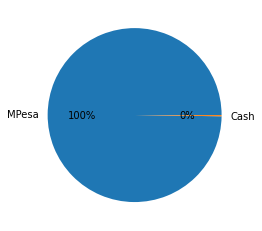

In [134]:
# Chart - 1 visualization code
pay_method=df["payment_method"].value_counts()
plt.pie(pay_method, labels=["MPesa","Cash"],autopct="%1.0f%%")
plt.show()

In [135]:
pay_method

Mpesa    51532
0          113
Name: payment_method, dtype: int64

##### 1. Why did you pick the specific chart?

It is easy to explain percentage comparison through area covered in a circle with different colors. thats why i used pie chart and which helped me to get comparision of deoendent variable

##### 2. What is/are the insight(s) found from the chart?

From above pie chart it clearly shows that most number of people used Mpesa over cash

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes of course it creates postive impact as most people using online transaction over cash that reduces time and increases productivity

#### Chart - 2 Bar plot on travel history (Univariate)

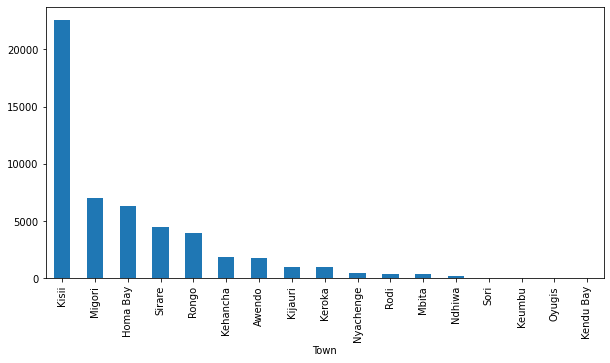

In [136]:
# Chart - 2 visualization code
travel_from=df["travel_from"].value_counts()

travel_from.plot(kind="bar",figsize=(10,5),xlabel="Town")

##### 1. Why did you pick the specific chart?

Bar plot is univariate plot it shows different observations of single variable

##### 2. What is/are the insight(s) found from the chart?

As we can see from barplot graph most number of rides originated from kissi followed by Migori while Kendu bay has lowest ride

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the information from above graph we got that would help in deciding the on which region we should focus on and give prefrence.

there are few towns which shows less ride 

#### Chart - 3-Travelling time

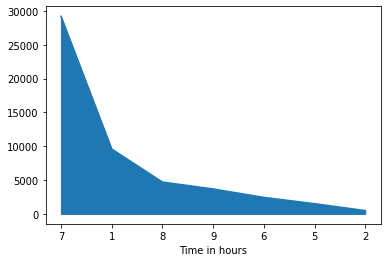

In [137]:
# Chart - 3 visualization code
travel_time=df["travel_time"].value_counts()
travel_time.plot(kind="area",xlabel="Time in hours")

##### 1. Why did you pick the specific chart?

Area plot is bivariate analysis that shows different observations of single variable.

##### 2. What is/are the insight(s) found from the chart?

As we can see most number of rides happening at 7 thats obivious because thats the time when people goto work and office.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can get the information about time according to that we can handle the traffic situation

#### Chart - 4- Countplot Maximum Capacity **Distribution**

<function matplotlib.pyplot.show(*args, **kw)>

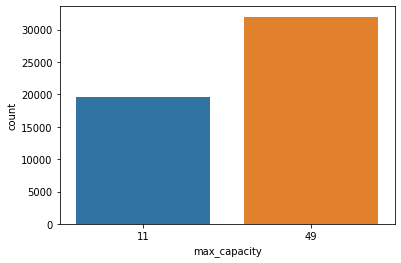

In [138]:
# Chart - 4 visualization code
mx=df["max_capacity"]
sns.countplot(mx)
plt.show

##### 1. Why did you pick the specific chart?

countplot is great for bivariate analysis it shows combination of two observation of single feature

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can see that there is only two observation in which one observation is bus and other observation is shuttle 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

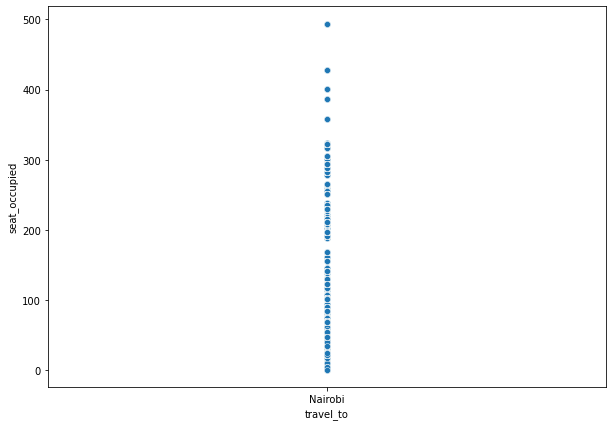

In [139]:
from seaborn.relational import scatterplot
# Chart - 5 visualization code
df["seat_occupied"].value_counts()
plt.figure(figsize=(10,7))
sns.scatterplot(x="travel_to",y="seat_occupied",data=df)


##### 1. Why did you pick the specific chart?

Scatterplot is good for two variable also wanted to show the relationship so i used the scatterplot

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that all the ride end in nairobi that means the final destination of all the ride is nairobi

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

from above grap we can fetch the informatio about where we need to focus and where we need to increase the facility

#### Chart - 6 line plot (Bivariate)

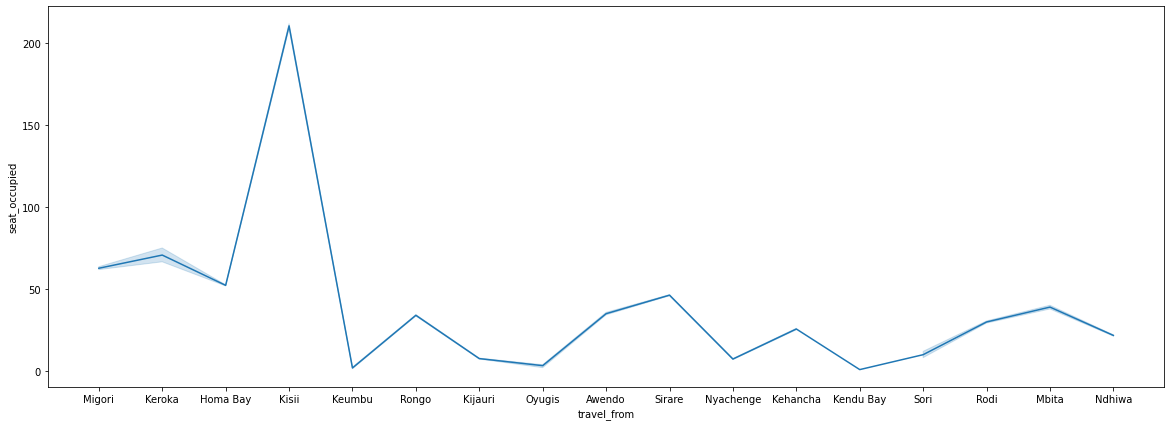

In [140]:
# Chart - 6 visualization code
df["seat_occupied"].value_counts()
plt.figure(figsize=(20,7))
sns.lineplot(x="travel_from",y="seat_occupied",data=df)


##### 1. Why did you pick the specific chart?

Lineplot is great for bivariate when you want to show multiple observation of same

##### 2. What is/are the insight(s) found from the chart?

As we can see from the graph most people travelling from Kisii followed by Keroka and all other towns have almost similar travelling rate

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

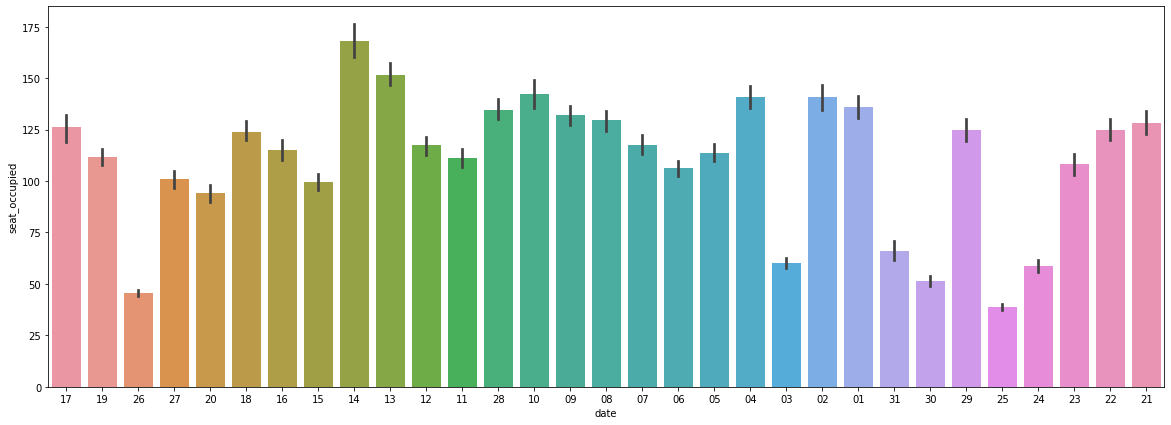

In [141]:
# Chart - 7 visualization code
df["seat_occupied"].value_counts()
plt.figure(figsize=(20,7))
sns.barplot(x="date",y="seat_occupied",data=df2)

##### 1. Why did you pick the specific chart?

Barplot is Bivariate analysis, it is used when we want to analyse on categorical variable and relationship between them

##### 2. What is/are the insight(s) found from the chart?

As we can see from bar plot some spike and decline in weekends depends on public holiday

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

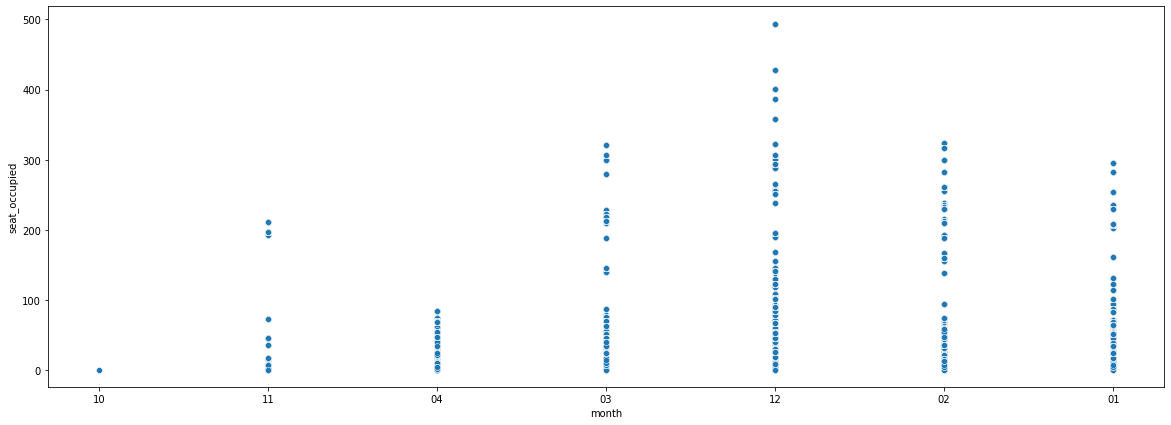

In [142]:
# Chart - 8 visualization code
df["seat_occupied"].value_counts()
plt.figure(figsize=(20,7))
sns.scatterplot(x=df2["month"],y="seat_occupied",data=df)

##### 1. Why did you pick the specific chart?

Scatterplot one of the great plot for bivariate when you want to show the relationship between two feature variable.


##### 2. What is/are the insight(s) found from the chart?

from above graph we can see the in the month of december maximum number of seats that means in this month most number of ride originated

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [143]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [144]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [145]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [146]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

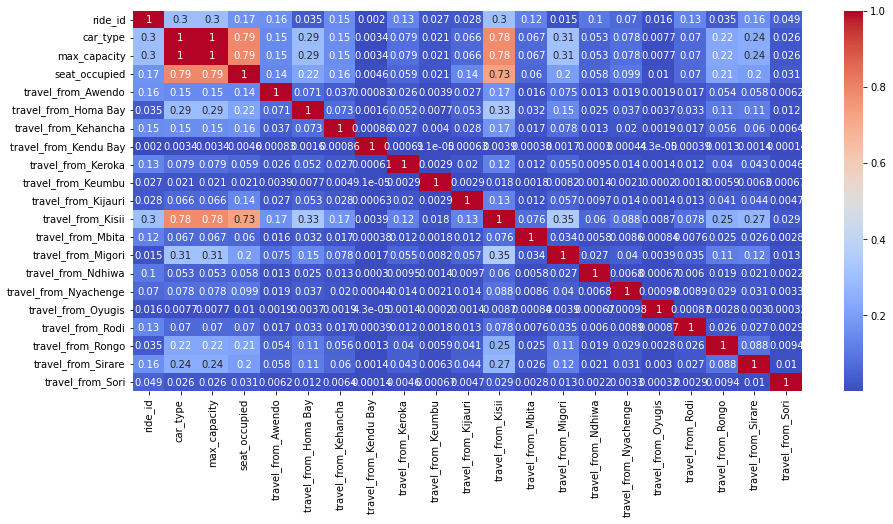

In [147]:
# Correlation Heatmap visualization code
correlation=df2.corr()
plt.figure(figsize=(15,7))
sns.heatmap(abs(correlation),cmap="coolwarm",annot=True)

##### 1. Why did you pick the specific chart?

Correlation matrix is a table showing correlation coefficients between variables. each cell in the table shows the correlation between two variable. a correlation map used to summarize the data as input into a more advanced analysis and as dignostic for advanced analysis.
the range of coorelation is [-1,1]


##### 2. What is/are the insight(s) found from the chart?

As we can see car_type and max_capacity two independent variable are highly correlated in future we need to remove one of them to avoid Multicollinearity.



#### Chart - 15 - Pair Plot 

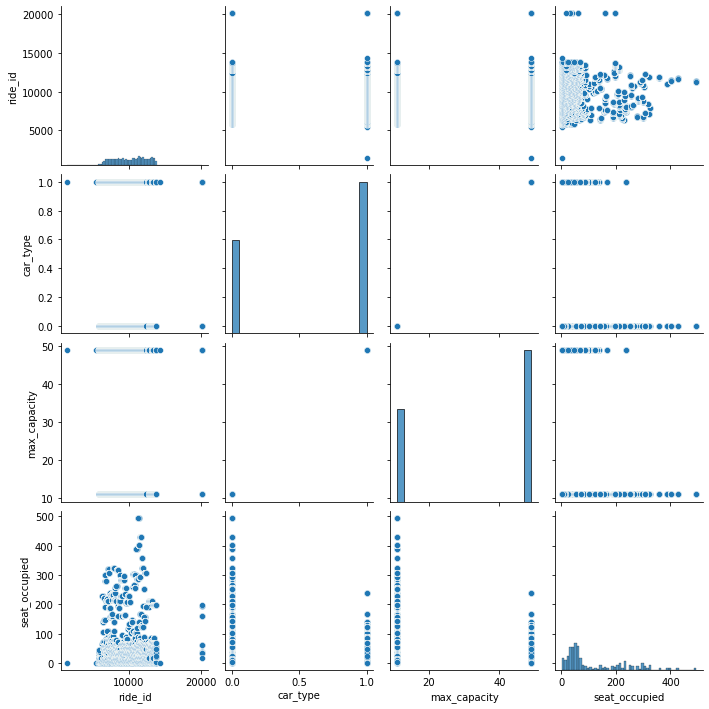

In [148]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand set of features to explain a relationship between two variable or to form the most separated clusters. it also helps to form some simple classification models by drawing some simple line or make linear separation in our data-set
i used pairplot to analyse the patterns of data and relationship between features and. its exactly same as coorelation map but here you will get grapjical represntation

##### 2. What is/are the insight(s) found from the chart?

from above chart

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [149]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [150]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [151]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [152]:
# Handling Missing Values & Missing Value Imputation
df2.isnull().sum()


ride_id                  0
payment_method           0
travel_date              0
travel_time              0
travel_to                0
car_type                 0
max_capacity             0
seat_occupied            0
date                     0
month                    0
year                     0
travel_from_Awendo       0
travel_from_Homa Bay     0
travel_from_Kehancha     0
travel_from_Kendu Bay    0
travel_from_Keroka       0
travel_from_Keumbu       0
travel_from_Kijauri      0
travel_from_Kisii        0
travel_from_Mbita        0
travel_from_Migori       0
travel_from_Ndhiwa       0
travel_from_Nyachenge    0
travel_from_Oyugis       0
travel_from_Rodi         0
travel_from_Rongo        0
travel_from_Sirare       0
travel_from_Sori         0
dtype: int64

**There's no missing value in the dataset**

---



#### What all missing value imputation techniques have you used and why did you use those techniques?

**There's no missing value in the dataset**

### 2. Handling Outliers

In [153]:
# Handling Outliers & Outlier treatments
sorted=np.sort(df2["seat_occupied"])



In [154]:
q3,q1=np.percentile(sorted,[75,25])

In [155]:
q3,q1

(210.0, 39.0)

In [156]:
#finding iqr
iqr=q3-q1
iqr

171.0

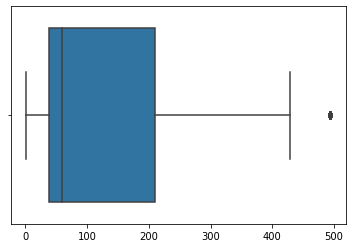

In [157]:
#Baxplot using seaborn
sns.boxplot(sorted)

In [158]:
df2["seat_occupied"].mean()

118.0673250072611

In [159]:
sorted1=df2[df2["seat_occupied"]<450]

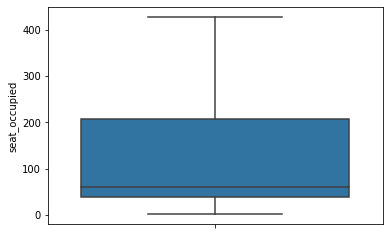

In [160]:
sns.boxplot(y="seat_occupied",data=sorted1)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [161]:
# Encode your categorical columns
df["payment_method"].replace({"MPesa":1,"Cash":0},inplace=True)
df["car_type"].replace({"Bus":1,"shuttle":0},inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is used for above

the basic strategy is to convert each category  value into a new column and assign a 1 or 0(True/False) value to column. this has the benefit of not weighting a value improperly

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [162]:
# Expand Contraction

#### 2. Lower Casing

In [163]:
# Lower Casing

#### 3. Removing Punctuations

In [164]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [165]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [166]:
# Remove Stopwords

In [167]:
# Remove White spaces

#### 6. Rephrase Text

In [168]:
# Rephrase Text

#### 7. Tokenization

In [169]:
# Tokenization

#### 8. Text Normalization

In [170]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [171]:
# POS Taging

#### 10. Text Vectorization

In [172]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [173]:
# Manipulate Features to minimize feature correlation and create new features
#creating new dataframe df2
df2

,ride_id,payment_method,travel_date,travel_time,travel_to,car_type,max_capacity,seat_occupied,date,month,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1442,Mpesa,17-10-17,7,Nairobi,1,49,1,17,10,...,0,0,1,0,0,0,0,0,0,0
1,5437,Mpesa,19-11-17,7,Nairobi,1,49,1,19,11,...,0,0,1,0,0,0,0,0,0,0
2,5710,Mpesa,26-11-17,7,Nairobi,1,49,1,26,11,...,0,0,0,0,0,0,0,0,0,0
3,5777,Mpesa,27-11-17,7,Nairobi,1,49,36,27,11,...,0,0,0,0,0,0,0,0,0,0
4,5778,Mpesa,27-11-17,7,Nairobi,1,49,45,27,11,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,Mpesa,20-04-18,8,Nairobi,1,49,48,20,04,...,0,0,0,0,0,0,0,0,0,0
51641,13809,Mpesa,20-04-18,8,Nairobi,1,49,69,20,04,...,0,0,1,0,0,0,0,0,0,0
51642,13809,Mpesa,20-04-18,8,Nairobi,1,49,69,20,04,...,0,0,1,0,0,0,0,0,0,0
51643,13796,Mpesa,20-04-18,7,Nairobi,1,49,48,20,04,...,0,0,0,0,0,0,0,0,0,0


#### 2. Feature Selection

In [174]:
# Select your features wisely to avoid overfitting

In [175]:
indep_var=df2.drop(columns={"seat_occupied"})

In [176]:
#dependent variable
dep_var=df2["seat_occupied"]

In [177]:
indep_var

,ride_id,payment_method,travel_date,travel_time,travel_to,car_type,max_capacity,date,month,year,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1442,Mpesa,17-10-17,7,Nairobi,1,49,17,10,17,...,0,0,1,0,0,0,0,0,0,0
1,5437,Mpesa,19-11-17,7,Nairobi,1,49,19,11,17,...,0,0,1,0,0,0,0,0,0,0
2,5710,Mpesa,26-11-17,7,Nairobi,1,49,26,11,17,...,0,0,0,0,0,0,0,0,0,0
3,5777,Mpesa,27-11-17,7,Nairobi,1,49,27,11,17,...,0,0,0,0,0,0,0,0,0,0
4,5778,Mpesa,27-11-17,7,Nairobi,1,49,27,11,17,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,Mpesa,20-04-18,8,Nairobi,1,49,20,04,18,...,0,0,0,0,0,0,0,0,0,0
51641,13809,Mpesa,20-04-18,8,Nairobi,1,49,20,04,18,...,0,0,1,0,0,0,0,0,0,0
51642,13809,Mpesa,20-04-18,8,Nairobi,1,49,20,04,18,...,0,0,1,0,0,0,0,0,0,0
51643,13796,Mpesa,20-04-18,7,Nairobi,1,49,20,04,18,...,0,0,0,0,0,0,0,0,0,0


**Finding the correlation in Multicollinearity in independent variable**

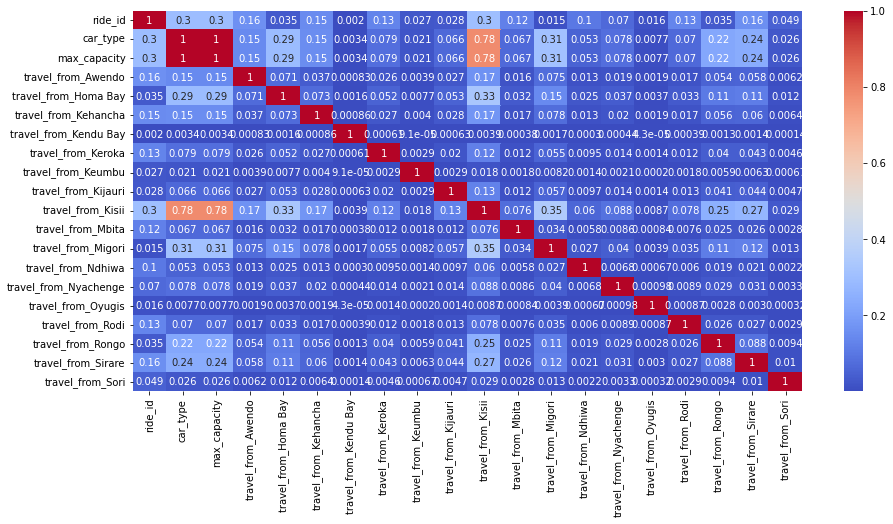

In [178]:
correlation=indep_var.corr()
plt.figure(figsize=(15,7))
sns.heatmap(abs(correlation),cmap="coolwarm",annot=True)

As we can see above Independent variable correlation car_type and max_capacity are highly correleated to each other that sign of multicollinearity we need to get rid one of them

Checking correleation in Original Dataset

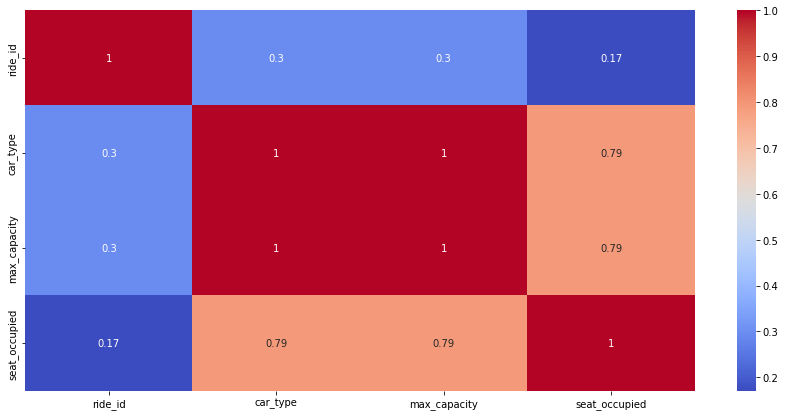

In [179]:
correlation=df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(abs(correlation),cmap="coolwarm",annot=True)

As we can see above Independent variable correlation car_type and max_capacity are highly correleated to each other that sign of multicollinearity we need to get rid one of them

Dropping some highly collinear and irrelevant columns and dependent variable

In [180]:
#Dropping some highly collinear and irrelevant columns and dependent variable
indep_var=df2.drop(columns={"ride_id","payment_method","travel_date","travel_to","seat_occupied","car_type"})
indep_var

,travel_time,max_capacity,date,month,year,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,7,49,17,10,17,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,7,49,19,11,17,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,7,49,26,11,17,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7,49,27,11,17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,49,27,11,17,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,8,49,20,04,18,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51641,8,49,20,04,18,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
51642,8,49,20,04,18,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
51643,7,49,20,04,18,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
indep_var.columns

Index(['travel_time', 'max_capacity', 'date', 'month', 'year',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori'],
      dtype='object')

In [182]:
dep_var

0         1
1         1
2         1
3        36
4        45
         ..
51640    48
51641    69
51642    69
51643    48
51644     1
Name: seat_occupied, Length: 51645, dtype: int64

##### What all feature selection methods have you used  and why?

I Dropped constant features, dropping columns having multicolinearity.
Feature selector that removes all low variance features.

Correleation has following properties

A value closer to 0 implies weaker correlation

A value closer to 1 implies stronger positive correlation


##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [183]:
# Transform Your data

### 6. Data Scaling

In [184]:
from sklearn.preprocessing import MinMaxScaler
# Scaling your data
min_max_scaler=MinMaxScaler()
indep_var=min_max_scaler.fit_transform(indep_var)
indep_var

array([[0.75      , 1.        , 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.875     , 1.        , 0.63333333, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 0.63333333, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.43333333, ..., 0.        , 0.        ,
        0.        ]])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [185]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [186]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(indep_var,dep_var,random_state=0,test_size=.30)

In [187]:
Xtrain

array([[0.5       , 0.        , 0.9       , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 0.73333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75      , 0.        , 0.93333333, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 0.86666667, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ]])

In [188]:
Ytrain

46543    211
18230     10
35304    428
47825     52
26979    258
        ... 
21243    254
45891      3
42613    192
43567     63
2732      41
Name: seat_occupied, Length: 36151, dtype: int64

##### What data splitting ratio have you used and why? 

there are two competing concerns:with less training dataset parameter estimate have greater variance and with less testing dataset performance statistic will have greater variance.
Training Dataset was small thats why i have taken 70:30 ratio

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

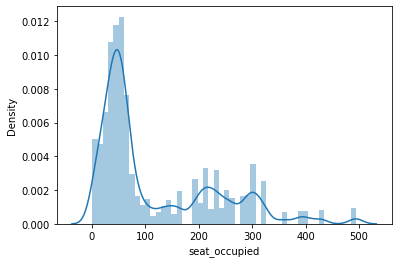

In [189]:
# Handling Imbalanced Dataset (If needed)
sns.distplot(df2["seat_occupied"])

In [190]:
#skewness metrix
df2["seat_occupied"].skew()

1.177968584112304

In [191]:
#apply log transformation
seat_occupied=np.log(df2["seat_occupied"])

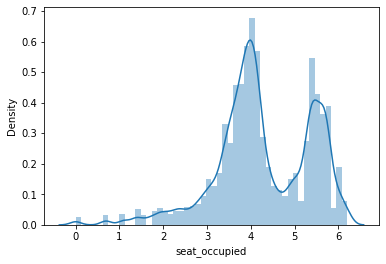

In [192]:
sns.distplot(seat_occupied)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Target variable was right skewed. log transformation was used for balancing data, beacuse log transformation is easy to use and reduce time consuming

## ***7. ML Model Implementation***

### **ML Model - 1 Implementing Linear Regression**

In [193]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
# Fit the Algorithm
model=LinearRegression()


In [194]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [195]:
#getting score on training dataset
r_squared=r2_score(Ytrain,model.predict(Xtrain))
r_squared

0.7320444407896595

**Variance Inflanation Factor(VIF)**

In [196]:
1/(r_squared)

1.3660372844595279

Variance Inflanation Factor is low so our model performing better

In [197]:
#getting score om test dataset
r2_score(Ytest,model.predict(Xtest))

0.7409389309102385

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [198]:
# Visualizing evaluation Metric Score chart
#r2 score used for checking performance of the model

#### 2. Cross- Validation & Hyperparameter Tuning

In [199]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## **ML Model - 2 Implementing Random Forrest Regressor**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [200]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=9,random_state=0,max_depth=5)
regressor.fit(Xtrain,Ytrain)
                                

RandomForestRegressor(max_depth=5, n_estimators=9, random_state=0)

In [201]:
preds=regressor.predict(Xtrain)

In [202]:
#model performance on training dataset
r2_score(Ytrain,preds)

0.8253067638340306

In [203]:
test_preds=regressor.predict(Xtest)

In [204]:
#model performance on test dataset
r2_score(Ytest,test_preds)

0.8324076114109453

#### 2. Cross- Validation & Hyperparameter Tuning

In [205]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
params={"min_child_weight":[10,20],
        "eta":[0.004,.04,4,40],
        "colsample_bytree":[0.7],
        "max_depth":[7,9,11]
                     }

                 



In [206]:

 import warnings
 warnings.filterwarnings("ignore") 

In [207]:
import xgboost as xgb

In [208]:
xgb=xgb.XGBRegressor(random_state=0)

In [209]:
# Fit the Algorithm
reg_gs=GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[06:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:04] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [210]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.004}

In [211]:
reg_optimal_model=reg_gs.best_estimator_

In [212]:
# Predict on the model
train_preds=reg_optimal_model.predict(Xtrain)

In [213]:
#model performance on training dataset
r2_score(Ytrain,train_preds)

0.9983269488023944

In [214]:
preds=reg_optimal_model.predict(Xtest)

In [215]:
#model performance on test dataset
r2_score(Ytest,preds)

0.9974537371783365

##### Which hyperparameter optimization technique have you used and why?

GridsearchCV which uses the grid search technique for finding the optimal hyperparameters to increase the model performance. our goal should find the best hyperparameter values to get the perfect prediction from the model.

GridsearchCV uses different combination of all the specified hyperparameters and their values and calcualte the performance for each combination and select the best value for the parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In Random Forrest Regressor training score is 0.828414 and test score  is 0.834003 while after hyperparameter tuning both score goes to 99.9%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

r2 squared used for performance measure

### **ML Model - 3- Implementing ridge Regression**

In [216]:
# ML Model - 3 Implementation
from sklearn import linear_model

# Fit the Algorithm
reg=linear_model.Ridge().fit(indep_var,dep_var)

# Predict on the model
r2_score(Ytrain,reg.predict(Xtrain))



0.7320392903885213

In [217]:
#model performance on test dataset
r2_score(Ytest,reg.predict(Xtest))

0.7412853180690626

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [218]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [219]:
from matplotlib import Parameter
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
ridge= Ridge()

parameters={"alpha": [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,40,45,50,55,60,100]}



In [220]:
ridge_regressor=GridSearchCV(ridge,parameters,cv=3)

In [221]:
# Fit the Algorithm
ridge_regressor.fit(Xtrain,Ytrain)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 40, 45, 50, 55, 60, 100]})

In [222]:
ridge_regressor.best_params_

{'alpha': 1e-10}

In [223]:
ridge_regressor.best_score_

0.7317819060071654

In [224]:
# Predict on the model
y_pred_ridge=ridge_regressor.predict(Xtrain)

In [225]:
#model performance on training dataset
r2_score(Ytrain,y_pred_ridge)

0.7321017325116707

In [226]:
#model performance on test dataset
r2_score(Ytest,ridge_regressor.predict(Xtest))

0.7409443293613229

##### Which hyperparameter optimization technique have you used and why?

GridsearchCV which uses the grid search technique for finding the optimal hyperparameters to increase the model performance. our goal should find the best hyperparameter values to get the perfect prediction from the model.

GridsearchCV uses different combination of all the specified hyperparameters and their values and calcualte the performance for each combination and select the best value for the parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement seen after applying gridsearchCV

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

r2 squared used for performance measure

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I used different type of regression algorithms to train my model like, Linear Regression, Regularized Linear Regression(Ridge), Random Forrest Regressor, XGboost regressor. And i tuned the parameters of XGboost regressor and also found the important features for training the  model. out of them XGboost with tuned parameter gave the best result.
So XGboost is best model with tuned parameter.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Linear model such as linear Regression follow the linearity principle that wo or more variables can be added together so that thier sum is a solution

So change in one of the features will affect the output. this is easy to understand and explain

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [227]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [228]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

I used different type of regression algorithms to train my model like, Linear Regression, Regularized Linear Regression(Ridge), Random Forrest Regressor, XGboost regressor. And i tuned the parameters of XGboost regressor and also found the important features for training the  model. out of them XGboost with tuned parameter gave the best result.

This resulting model can be used by Mobiticket and bus operators to anticipate customer demand for certain rides, to manage resources and vehicles more efficiently and to offer promotions and sell

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***